In [27]:
from matplotlib import pyplot as plt
import re
import seaborn as sns; sns.set()

In [28]:
all_data = {}

sizes = [20, 32, 44, 56, 110, 164]

for i in sizes:
    with open(f"MResNet{i}.txt") as f:
        lines = f.read()
    
    data = re.findall(
        r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
        lines,
        re.MULTILINE,
    )
    # print(len(data))
    # print(data)
    epochs = [int(x[0]) for x in data]
    losses = [float(x[1]) for x in data]
    accuracies = [float(x[2]) for x in data]
    test_losses = [float(x[3]) for x in data]
    
    all_data[i]  = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

all_data.keys()

dict_keys([20, 32, 44, 56, 110, 164])

In [29]:
#for i in sizes:
#    assert len(all_data[i]["epochs"]) == 160

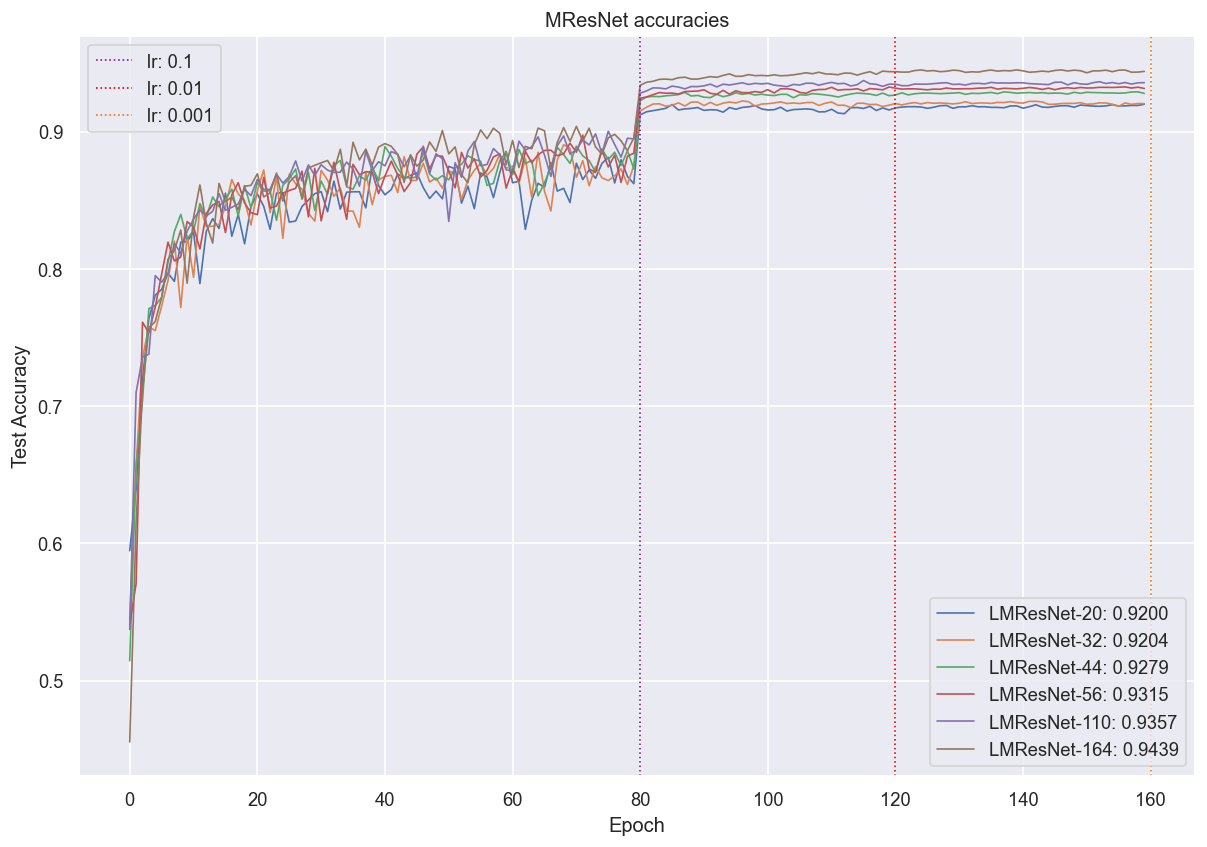

In [30]:
epochs = list(range(1, 161))
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

fix, ax = plt.subplots(figsize=(12,8), dpi=120)
handles = []
for i in sizes:
    series = all_data[i]["accuracies"]
    h, = ax.plot(series, label=f"LMResNet-{i}: {series[-1]:.4f}", linewidth=1)
    handles.append(h)

first_legend = plt.legend(handles=handles)
ax = plt.gca().add_artist(first_legend)

plt.title(f"MResNet accuracies")
#ax.set_ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")

# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

axvhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    axvhs.append(h)

plt.legend(handles=axvhs)
plt.show()

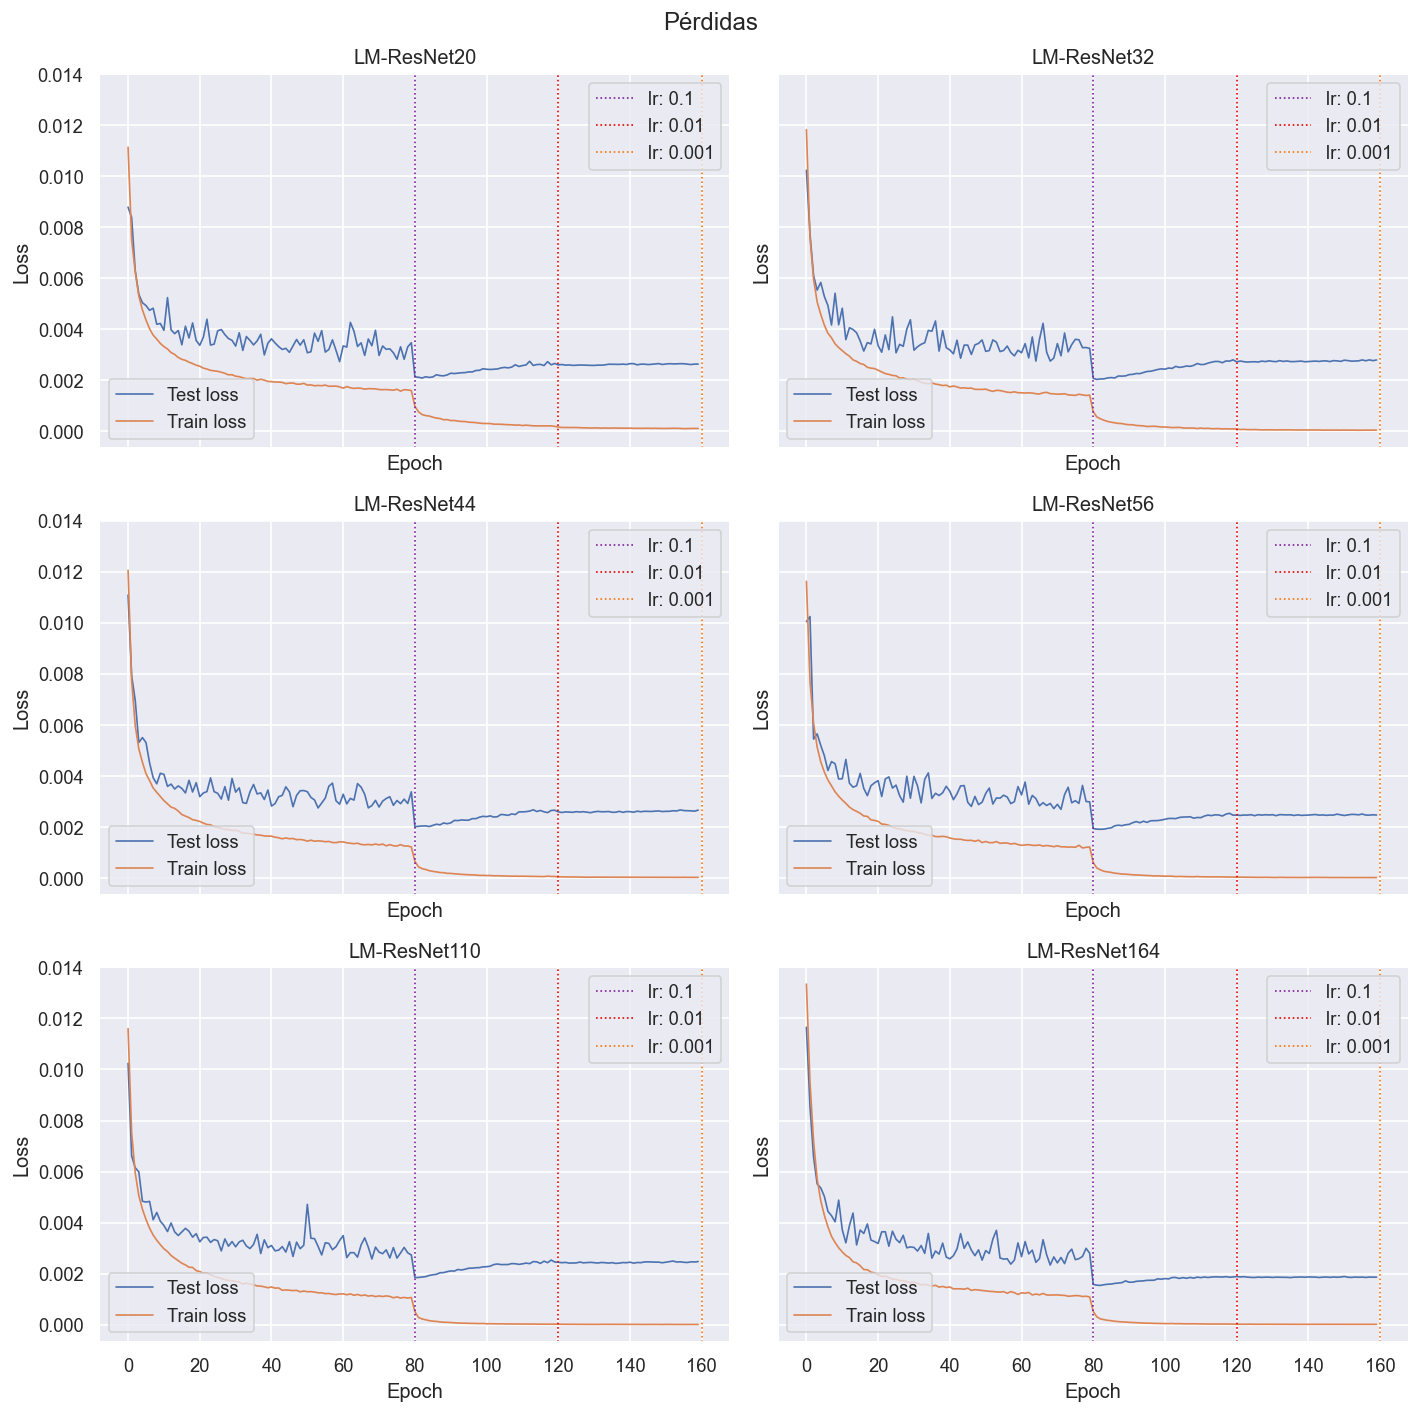

In [31]:
import itertools as it

fix, axes = plt.subplots(figsize=(12,12), dpi=120, nrows=3, ncols=2, sharey=True, sharex=True)
axes = list(it.chain.from_iterable(axes))

for i, ax in zip(sizes, axes):
    test_l = all_data[i]["test_losses"]
    train_l = all_data[i]["losses"]
    h1, = ax.plot(test_l, label=f"Test loss", linewidth=1)
    h2, = ax.plot(train_l, label=f"Train loss", linewidth=1)
    first_legend = ax.legend(handles=[h1, h2], loc="lower left")
    ax.add_artist(first_legend)

    lrhs = []
    for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
        lr_h = ax.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
        lrhs.append(lr_h)
    
    ax.legend(handles=lrhs, loc="upper right")
    ax.set_title(f"LM-ResNet{i}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    # ax.set_yscale("log")

plt.suptitle("Pérdidas")
plt.tight_layout()
plt.show()

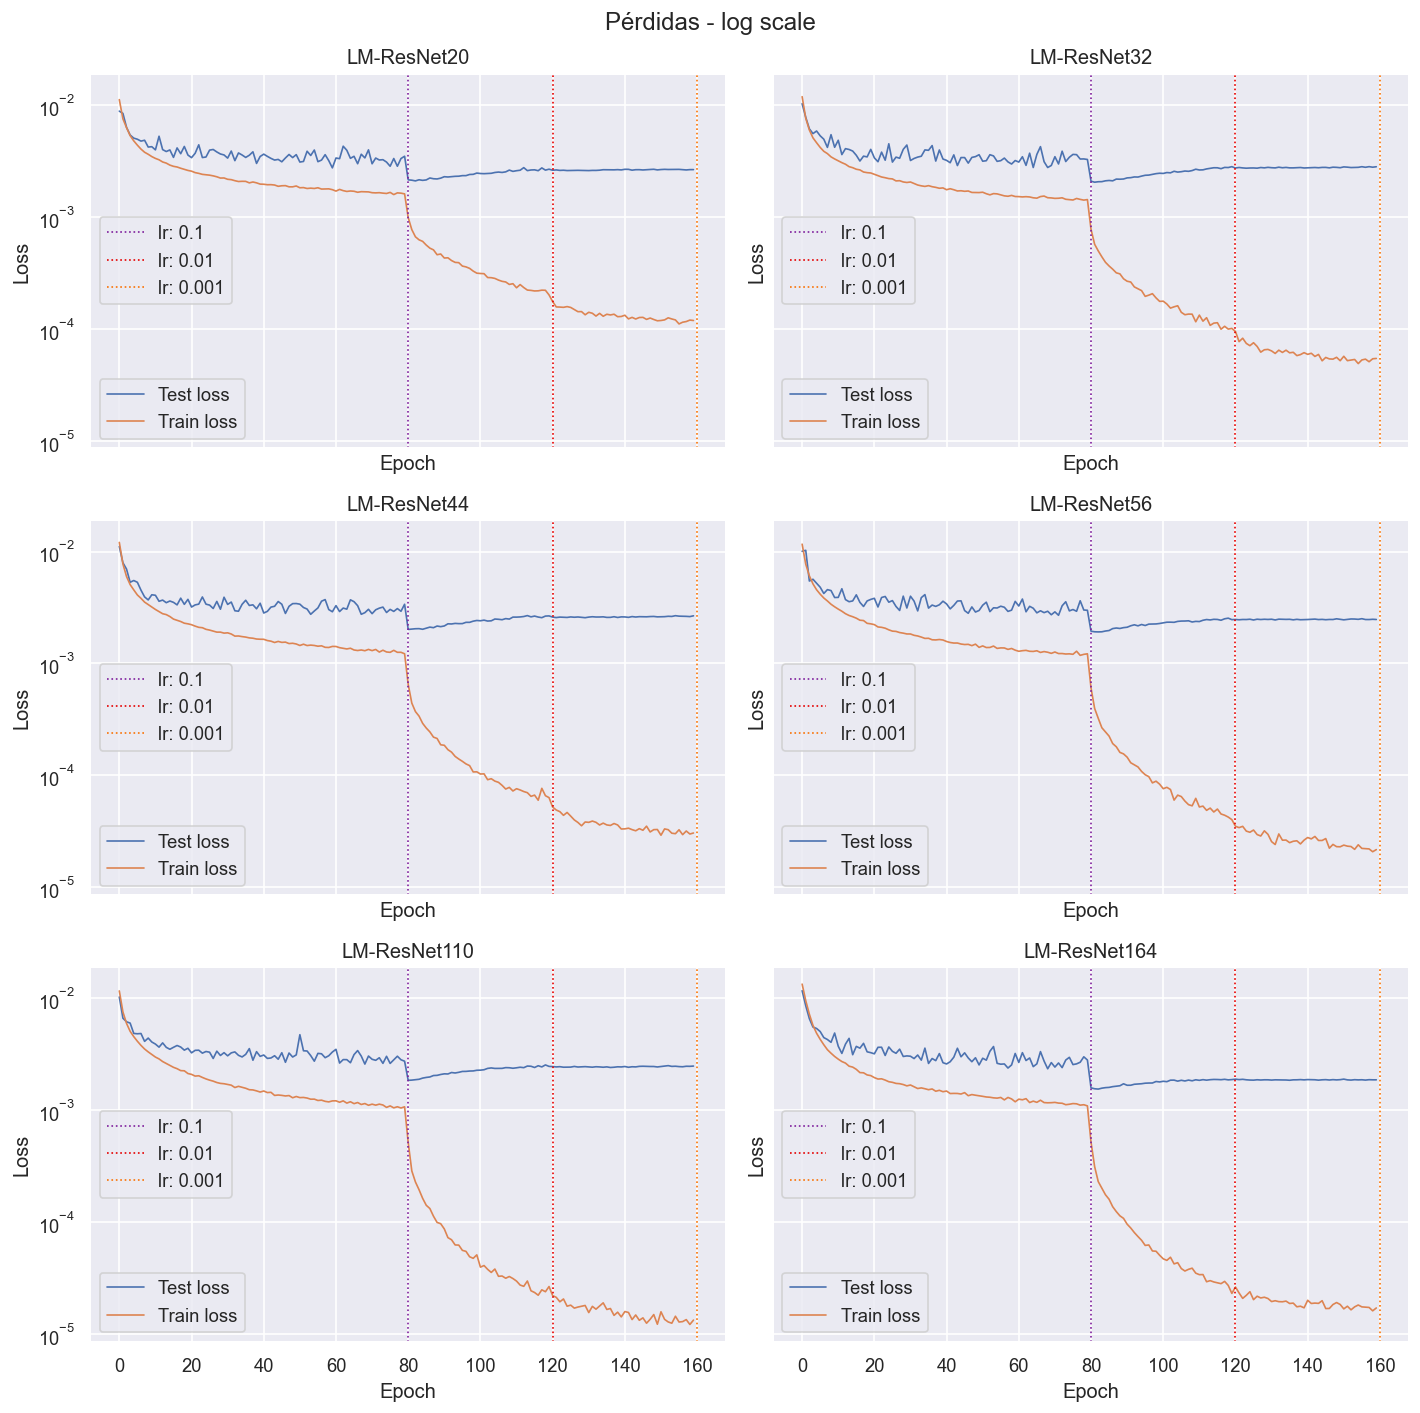

In [32]:
import itertools as it

fix, axes = plt.subplots(figsize=(12,12), dpi=120, nrows=3, ncols=2, sharey=True, sharex=True)
axes = list(it.chain.from_iterable(axes))

for i, ax in zip(sizes, axes):
    test_l = all_data[i]["test_losses"]
    train_l = all_data[i]["losses"]
    h1, = ax.plot(test_l, label=f"Test loss", linewidth=1)
    h2, = ax.plot(train_l, label=f"Train loss", linewidth=1)
    first_legend = ax.legend(handles=[h1, h2], loc="lower left")
    ax.add_artist(first_legend)

    lrhs = []
    for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
        lr_h = ax.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
        lrhs.append(lr_h)
    
    ax.legend(handles=lrhs, loc="center left")
    ax.set_title(f"LM-ResNet{i}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_yscale("log")

plt.suptitle("Pérdidas - log scale")
plt.tight_layout()
plt.show()

{1: -0.0992332473397255, 2: -0.2964474856853485, 3: -0.07815780490636826, 4: -0.042574722319841385, 5: 0.3800286054611206, 6: 0.1298094540834427, 7: -0.09173706918954849, 8: 0.8272956013679504, 9: -0.03170962259173393}
{1: -0.060377951711416245, 2: -0.13264203071594238, 3: -0.07228997349739075, 4: -0.179444819688797, 5: -0.22752025723457336, 6: -0.08208674937486649, 7: 0.5526715517044067, 8: 0.2241944521665573, 9: 0.10208940505981445, 10: -0.18148314952850342, 11: -0.019396567717194557, 12: 0.6443552374839783, 13: 0.18655672669410706, 14: 0.05567491427063942, 15: -1.9068784713745117}
{1: -0.06827771663665771, 2: 0.0535958893597126, 3: -0.02412267029285431, 4: -0.17381121218204498, 5: -0.19506211578845978, 6: 0.018931997939944267, 7: -0.4440320134162903, 8: -0.06110716983675957, 9: 0.560255765914917, 10: 0.23916877806186676, 11: 0.14475910365581512, 12: -0.01946522668004036, 13: -0.09764590114355087, 14: -0.21071463823318481, 15: -0.08955641090869904, 16: 0.6616848111152649, 17: 0.08932

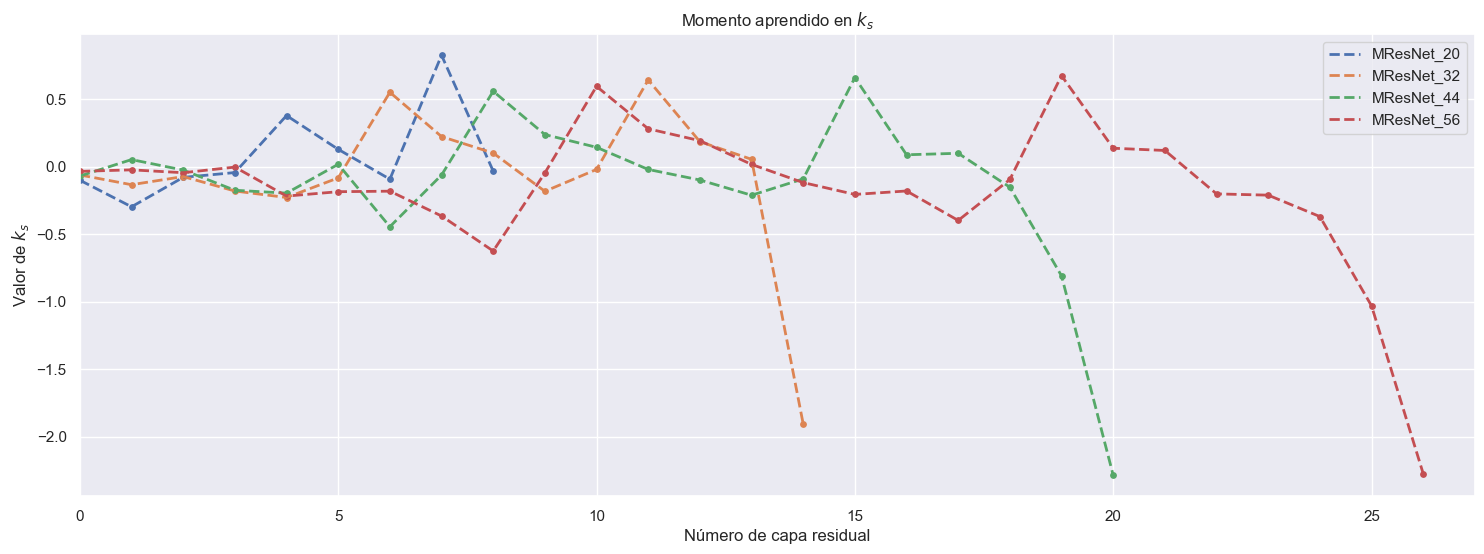

In [33]:
sizes = [20,32,44,56]

kss = {}

for i in sizes:
    with open(f"MResNet{i}_ks.txt") as f:
        _i = {}
        for line in f:
            idx, val = line.split(",")
            _i[int(idx)] = float(val)
        kss[i] = _i

f, ax = plt.subplots(figsize=(18,6))

for resnet_size, values in kss.items():
    print(values)
    assert len(values) == (resnet_size - 2)//2, f"{len(values)=} {(resnet_size-2)//2=}"
    w = ((resnet_size - 2) // 2) - 1
    _y = []
    for k, v in values.items():
        #if k%w ==1:
        #    continue
        _y.append(v)
    _x = list(range(0, len(_y)))
    plt.plot(_x, _y, label=f"MResNet_{resnet_size}", linewidth=2, linestyle="--")
    plt.scatter(_x, _y, s=15)

plt.xlim(0, max(_x)+1)
plt.xlabel("Número de capa residual")
plt.ylabel("Valor de $k_s$")
plt.title("Momento aprendido en $k_s$")
plt.legend()
plt.show()

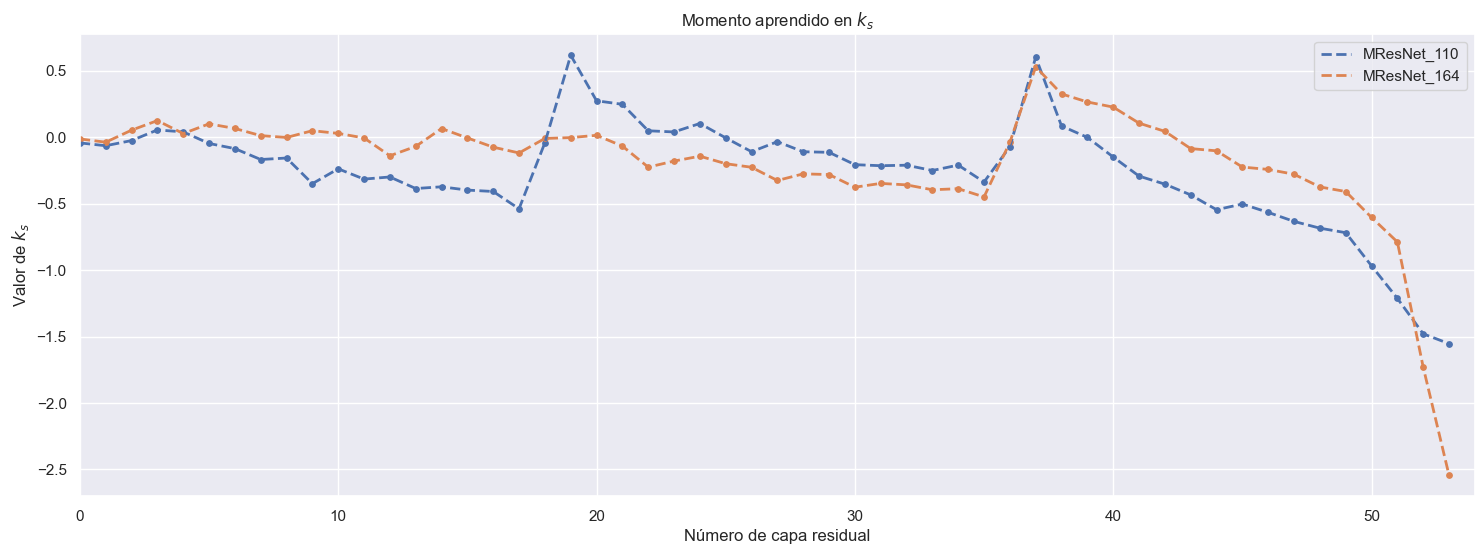

In [35]:
sizes = [110, 164]

kss = {}

for i in sizes:
    with open(f"MResNet{i}_ks.txt") as f:
        _i = {}
        for line in f:
            idx, val = line.split(",")
            _i[int(idx)] = float(val)
        kss[i] = _i

f, ax = plt.subplots(figsize=(18,6))

for resnet_size, values in kss.items():
    #assert len(values) == (resnet_size - 2)//2, f"{len(values)=} {(resnet_size-2)//2=}"
    #w = ((resnet_size - 2) // 2) - 1
    _y = []
    for k, v in values.items():
        #if k%w ==1:
        #    continue
        _y.append(v)
    _x = list(range(0, len(_y)))
    plt.plot(_x, _y, label=f"MResNet_{resnet_size}", linewidth=2, linestyle="--")
    plt.scatter(_x, _y, s=15)

plt.xlim(0, max(_x)+1)
plt.xlabel("Número de capa residual")
plt.ylabel("Valor de $k_s$")
plt.title("Momento aprendido en $k_s$")
plt.legend()
plt.show()